In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 kB 6.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from ultralytics import YOLO
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import glob
import random
import yaml
import os
from sklearn.model_selection import train_test_split

In [ ]:
DIR = "/content/drive/MyDrive/Colab Notebooks/archive"
IMAGES = DIR +"images/"
LABELS = DIR +"labels/"

TRAIN = "/content/drive/MyDrive/Colab Notebooks/archive/train_zip"
TEST = "/content/drive/MyDrive/Colab Notebooks/archive/test_zip"

In [ ]:
df = pd.read_csv("/content/fruit.csv")
df

,x,y,class
0,4.194795,-0.938062,apple
1,8.269129,-4.450061,apple
2,8.451618,3.547347,apple
3,7.127931,-4.404420,apple
4,5.993756,5.669073,apple
...,...,...,...
1495,5.723135,10.423754,orange
1496,5.526111,6.526867,orange
1497,11.748750,10.888969,orange
1498,11.408684,9.115518,orange


In [ ]:
files = list(df['class'].unique())


files_train, files_valid = train_test_split(files, test_size = 0.2)

In [ ]:
files

['apple', 'banana', 'orange']

In [ ]:
# make directories
os.makedirs(IMAGES+"train", exist_ok=True)
os.makedirs(LABELS+"train", exist_ok=True)
os.makedirs(IMAGES+"valid", exist_ok=True)
os.makedirs(LABELS+"valid", exist_ok=True)

In [ ]:
train_filename = set(files_train)
valid_filename = set(files_valid)
for file in glob.glob(TRAIN+"/*"):
    fname =os.path.basename(file)
    if fname in train_filename:
        shutil.copy(file, IMAGES+"train")
    elif fname in valid_filename:
        shutil.copy(file, IMAGES+"valid")

In [ ]:
for _, row in df.iterrows():
    image_file = row['class']
    class_id = "0"
    x = row['x']
    y = row['y']
    width = row['x'] - row['x']
    height = row['y'] - row['y']

    x_center = x + (width / 2)
    y_center = y + (height / 2)
    x_center /= 676
    y_center /= 380
    width /= 676
    height /= 380

    if image_file in train_filename:
        annotation_file = os.path.join(LABELS) + "train/" + image_file.replace('.jpg', '.txt')
    else:
        annotation_file = os.path.join(LABELS) + "valid/" + image_file.replace('.jpg', '.txt')

    with open(annotation_file, 'a') as ann_file:
        ann_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

In [ ]:
%%writefile dataseet.yaml
# Path
path: fruit
train: images/train
val: images/valid

# Classes
nc: 1
names: ["fruit"]

Overwriting dataseet.yaml


In [ ]:
!pip install wandb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.1/277.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
import wandb
wandb.init(mode="disabled")

In [ ]:
model = YOLO('yolov8n.pt')
model.train(data="/content/coco128.yaml", epochs=100, batch=8)


New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/coco128.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

100%|██████████| 6.66M/6.66M [00:00<00:00, 132MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 3725.54file/s]

Dataset download success ✅ (1.3s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 274.22it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.44G      1.152      1.702       1.26         49        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]

                   all        128        929      0.701      0.523      0.622      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.42G      1.237       1.48       1.24        125        640: 100%|██████████| 16/16 [00:03<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all        128        929      0.685       0.57      0.649       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.41G      1.236      1.407      1.242        117        640: 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.24it/s]


                   all        128        929      0.731      0.611      0.671      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.41G      1.233      1.391      1.265         79        640: 100%|██████████| 16/16 [00:03<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.01it/s]


                   all        128        929      0.714      0.624      0.685      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.42G       1.15      1.276      1.189         91        640: 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]


                   all        128        929      0.727      0.615      0.692      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       1.4G      1.104      1.245      1.195        123        640: 100%|██████████| 16/16 [00:02<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.50it/s]


                   all        128        929      0.725      0.618      0.695      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.42G      1.151      1.318       1.21        131        640: 100%|██████████| 16/16 [00:02<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]

                   all        128        929      0.797      0.601      0.702      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.41G      1.133      1.334      1.191         87        640: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.92it/s]


                   all        128        929       0.83      0.606      0.714      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.44G      1.051      1.179      1.182         98        640: 100%|██████████| 16/16 [00:02<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.79it/s]


                   all        128        929      0.829      0.616      0.725      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.39G      1.158      1.209      1.215         77        640: 100%|██████████| 16/16 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]

                   all        128        929      0.851      0.605       0.73      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       1.4G      1.096      1.182      1.181        127        640: 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.26it/s]


                   all        128        929      0.783      0.648       0.74       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.41G      1.059      1.148      1.195         89        640: 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]

                   all        128        929      0.813      0.639       0.74      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.41G       1.04      1.098       1.15        118        640: 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]


                   all        128        929      0.829      0.633      0.751      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.41G      1.076      1.157      1.178        103        640: 100%|██████████| 16/16 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]


                   all        128        929       0.72      0.702      0.756      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.42G      1.041      1.099       1.12        148        640: 100%|██████████| 16/16 [00:03<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]


                   all        128        929       0.75      0.688      0.766      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.44G      1.027      1.083      1.173         80        640: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.12it/s]


                   all        128        929      0.828      0.666      0.771      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       1.5G       1.11      1.112      1.168        129        640: 100%|██████████| 16/16 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]


                   all        128        929      0.718      0.742      0.794      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.39G      1.007      1.018      1.135         86        640: 100%|██████████| 16/16 [00:02<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]


                   all        128        929      0.747      0.744      0.801      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.43G      1.002      1.049      1.157        140        640: 100%|██████████| 16/16 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]


                   all        128        929      0.775      0.741      0.808      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.44G      1.085      1.072      1.178         72        640: 100%|██████████| 16/16 [00:02<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]

                   all        128        929      0.778      0.744      0.809      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.42G      1.027      1.009      1.154        104        640: 100%|██████████| 16/16 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        128        929       0.77      0.759      0.809      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.42G      1.055      1.031      1.138         94        640: 100%|██████████| 16/16 [00:03<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.47it/s]


                   all        128        929      0.776      0.757      0.812      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.43G     0.9951     0.9973       1.11        175        640: 100%|██████████| 16/16 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.30it/s]


                   all        128        929      0.773      0.762      0.817      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.41G      1.032     0.9644       1.13         66        640: 100%|██████████| 16/16 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]


                   all        128        929      0.761      0.769      0.816      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.42G      1.005     0.9778       1.13         89        640: 100%|██████████| 16/16 [00:02<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.52it/s]


                   all        128        929      0.766      0.778      0.819      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.41G     0.9949     0.9559      1.122        135        640: 100%|██████████| 16/16 [00:02<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]

                   all        128        929      0.779      0.775      0.826      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.41G     0.9845     0.9836      1.121        144        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.91it/s]


                   all        128        929      0.763      0.772      0.831      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.41G     0.9706     0.9522       1.13        115        640: 100%|██████████| 16/16 [00:02<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.30it/s]


                   all        128        929      0.809      0.755       0.83      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       1.4G     0.9501     0.9637      1.123        114        640: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]


                   all        128        929      0.818      0.751      0.835      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       1.4G      1.003     0.9348      1.133         94        640: 100%|██████████| 16/16 [00:03<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]

                   all        128        929      0.837      0.736      0.833      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       1.4G      0.968     0.9631      1.116        103        640: 100%|██████████| 16/16 [00:02<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]

                   all        128        929      0.846       0.74      0.834      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.38G      0.965     0.9015      1.123         75        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]


                   all        128        929      0.813      0.779      0.837      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.43G     0.9914      0.927      1.104        121        640: 100%|██████████| 16/16 [00:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.02it/s]


                   all        128        929      0.828      0.778      0.842       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.51G     0.9943     0.8747      1.095        108        640: 100%|██████████| 16/16 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]


                   all        128        929      0.849      0.774      0.844      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.39G     0.9708     0.8924       1.11        184        640: 100%|██████████| 16/16 [00:02<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.35it/s]


                   all        128        929      0.844      0.773      0.844      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.43G     0.9484     0.9097       1.09        142        640: 100%|██████████| 16/16 [00:02<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.32it/s]

                   all        128        929       0.81      0.796      0.845      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       1.4G     0.9363     0.8162      1.089        154        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.65it/s]


                   all        128        929      0.813      0.809      0.849      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       1.4G      0.956     0.8632      1.099        153        640: 100%|██████████| 16/16 [00:02<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.82it/s]


                   all        128        929      0.807       0.81      0.849      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.42G     0.9146     0.8799      1.098        114        640: 100%|██████████| 16/16 [00:03<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]

                   all        128        929      0.845      0.789      0.853      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.39G     0.9327     0.8472      1.076        114        640: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]

                   all        128        929       0.86       0.78      0.859      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.51G     0.9637     0.9009      1.108        126        640: 100%|██████████| 16/16 [00:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]


                   all        128        929      0.835      0.785      0.858      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.42G     0.9839     0.8883      1.114         70        640: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.38it/s]


                   all        128        929      0.833      0.783      0.855      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.43G     0.9195     0.8557      1.064         97        640: 100%|██████████| 16/16 [00:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]

                   all        128        929      0.779      0.815      0.852      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.42G     0.9383     0.8517      1.095         99        640: 100%|██████████| 16/16 [00:03<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]


                   all        128        929      0.822      0.799      0.855      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.43G     0.9078     0.8592      1.088        121        640: 100%|██████████| 16/16 [00:02<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]


                   all        128        929      0.825      0.794      0.849      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.42G     0.9209     0.8325      1.094         64        640: 100%|██████████| 16/16 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]


                   all        128        929      0.847      0.786      0.851      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.43G     0.9818     0.8927      1.074        107        640: 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.65it/s]


                   all        128        929      0.852      0.782      0.855      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.42G     0.9053      0.857      1.092         75        640: 100%|██████████| 16/16 [00:02<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]


                   all        128        929      0.867       0.78      0.857      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.39G     0.9875     0.8554       1.11        109        640: 100%|██████████| 16/16 [00:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]

                   all        128        929      0.878      0.777      0.862       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.42G     0.9029     0.8073      1.089         78        640: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.04it/s]


                   all        128        929      0.878      0.779      0.862      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.42G     0.8952     0.8079      1.079         95        640: 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.80it/s]


                   all        128        929      0.874      0.779      0.858      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.55G     0.9645     0.8427      1.083        199        640: 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]


                   all        128        929      0.877      0.775       0.86        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.41G     0.9459     0.8608      1.085         65        640: 100%|██████████| 16/16 [00:02<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.65it/s]


                   all        128        929      0.901       0.77      0.862      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.38G     0.8956     0.8399      1.071         97        640: 100%|██████████| 16/16 [00:02<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]

                   all        128        929      0.902      0.773      0.864      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       1.4G     0.9708     0.8402       1.07        111        640: 100%|██████████| 16/16 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]


                   all        128        929      0.903      0.773      0.865      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.41G     0.8773      0.792      1.065         82        640: 100%|██████████| 16/16 [00:02<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.07it/s]


                   all        128        929      0.883      0.784      0.862      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       1.4G     0.9384     0.8335      1.103         81        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        128        929      0.887      0.784      0.863        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.43G      0.902     0.7795      1.068         87        640: 100%|██████████| 16/16 [00:02<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]


                   all        128        929      0.875      0.792      0.868      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.42G      0.905     0.8164      1.057        195        640: 100%|██████████| 16/16 [00:02<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]


                   all        128        929       0.89      0.789      0.869      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.39G     0.9049     0.8076      1.057        154        640: 100%|██████████| 16/16 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.89it/s]


                   all        128        929      0.887      0.783      0.868      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.38G     0.9019     0.8097      1.081        108        640: 100%|██████████| 16/16 [00:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.35it/s]


                   all        128        929      0.894      0.785      0.872      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       1.4G      0.831     0.7424      1.042         94        640: 100%|██████████| 16/16 [00:03<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        128        929      0.877      0.794       0.87      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.43G     0.8709     0.7765       1.07         86        640: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.89it/s]


                   all        128        929      0.881      0.801      0.872      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.38G     0.8834     0.7786      1.053        119        640: 100%|██████████| 16/16 [00:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]


                   all        128        929      0.891      0.797      0.872      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.44G     0.8581     0.7355      1.043        147        640: 100%|██████████| 16/16 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.09it/s]


                   all        128        929      0.891      0.798      0.873      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.43G     0.9052     0.8049      1.058         90        640: 100%|██████████| 16/16 [00:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.18it/s]


                   all        128        929      0.891      0.793      0.872      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.43G      0.865     0.7608      1.038         91        640: 100%|██████████| 16/16 [00:02<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.30it/s]

                   all        128        929      0.891        0.8      0.874      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.38G     0.8519     0.7607      1.039         81        640: 100%|██████████| 16/16 [00:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]


                   all        128        929      0.915      0.783      0.873       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.43G     0.9029      0.793      1.078        114        640: 100%|██████████| 16/16 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.72it/s]

                   all        128        929      0.904      0.792      0.874       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.42G     0.8881     0.7684       1.06        100        640: 100%|██████████| 16/16 [00:04<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]


                   all        128        929      0.911      0.793      0.874      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       1.4G      0.897     0.7652      1.053        112        640: 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.44it/s]


                   all        128        929      0.909      0.792      0.874      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.38G     0.8694     0.7288      1.029        121        640: 100%|██████████| 16/16 [00:02<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        128        929      0.918      0.788      0.876      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.44G     0.8591     0.7954      1.055        103        640: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.41it/s]


                   all        128        929      0.916      0.787      0.876      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.38G      0.866     0.7559      1.061         74        640: 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.95it/s]


                   all        128        929      0.894      0.797       0.88      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.38G      0.848     0.7773      1.063         66        640: 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.86it/s]

                   all        128        929      0.892      0.797      0.881      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.44G     0.8812     0.7834      1.049         50        640: 100%|██████████| 16/16 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]


                   all        128        929      0.885      0.802       0.88      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       1.4G     0.8451     0.7727      1.058        123        640: 100%|██████████| 16/16 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.03it/s]


                   all        128        929      0.905      0.792      0.881       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.41G     0.9012     0.7756      1.056         86        640: 100%|██████████| 16/16 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]


                   all        128        929      0.913      0.786      0.882      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.42G     0.8694      0.735      1.052         99        640: 100%|██████████| 16/16 [00:02<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.96it/s]


                   all        128        929      0.911      0.792      0.882       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       1.4G     0.8646     0.7474      1.038        141        640: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        128        929      0.891      0.805      0.883      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.38G     0.7948     0.7003      1.023         78        640: 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.17it/s]


                   all        128        929      0.899      0.801       0.88       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.42G     0.8806     0.7848      1.064         86        640: 100%|██████████| 16/16 [00:02<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        128        929      0.889      0.802       0.88       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       1.4G     0.9337     0.7911      1.049        115        640: 100%|██████████| 16/16 [00:03<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]


                   all        128        929      0.882      0.813      0.882       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.42G     0.8797     0.7715      1.045         99        640: 100%|██████████| 16/16 [00:02<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        128        929        0.9      0.803      0.882      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       1.4G      0.878     0.7529      1.047         94        640: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.34it/s]


                   all        128        929      0.877      0.819      0.881      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.41G     0.8395     0.7385      1.051         68        640: 100%|██████████| 16/16 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.92it/s]


                   all        128        929      0.875      0.823      0.883      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       1.4G     0.8479     0.7822      1.053         68        640: 100%|██████████| 16/16 [00:02<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        128        929      0.879      0.823      0.883       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.42G     0.8418     0.7484      1.065         91        640: 100%|██████████| 16/16 [00:02<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.21it/s]


                   all        128        929      0.869      0.824      0.883      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       1.4G       0.88     0.7788      1.056         88        640: 100%|██████████| 16/16 [00:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]


                   all        128        929      0.873       0.82      0.885      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.43G     0.8419     0.7392      1.057         71        640: 100%|██████████| 16/16 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]


                   all        128        929      0.871      0.828      0.883       0.73
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       1.4G      0.908     0.7713      1.037         20        640: 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.97it/s]


                   all        128        929      0.867      0.828      0.883      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.42G     0.8856     0.7673      1.016         91        640: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]


                   all        128        929      0.865      0.834      0.882      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.42G     0.9021     0.7623      1.058         43        640: 100%|██████████| 16/16 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.08it/s]


                   all        128        929      0.875      0.827      0.881      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       1.4G     0.8928     0.7641      1.039         87        640: 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.25it/s]


                   all        128        929      0.881      0.817      0.879      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.44G     0.8854     0.8096      1.018         36        640: 100%|██████████| 16/16 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]


                   all        128        929      0.896      0.799      0.873      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.42G     0.8389     0.7443     0.9887         81        640: 100%|██████████| 16/16 [00:02<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.45it/s]


                   all        128        929      0.885      0.806      0.877      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.42G     0.8229      0.688      1.014         32        640: 100%|██████████| 16/16 [00:02<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all        128        929      0.885      0.808      0.877      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.42G     0.8698     0.7711       1.02         59        640: 100%|██████████| 16/16 [00:03<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.07it/s]


                   all        128        929      0.884      0.807      0.878       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.42G     0.8324     0.7169     0.9914         80        640: 100%|██████████| 16/16 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.81it/s]


                   all        128        929       0.89      0.804      0.879      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.42G     0.8622     0.7447      1.025         35        640: 100%|██████████| 16/16 [00:03<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        128        929      0.892      0.805      0.879      0.711



100 epochs completed in 0.164 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        128        929      0.869      0.824      0.883      0.732
                person        128        254      0.974      0.725      0.874      0.699
               bicycle        128          6      0.901        0.5      0.705      0.562
                   car        128         46      0.803      0.413      0.598      0.337
            motorcycle        128          5      0.925          1      0.995      0.903
              airplane        128          6      0.945          1      0.995       0.95
                   bus        128          7          1       0.81      0.995      0.835
                 train        128          3      0.907          1      0.995      0.888
                 truck        128         12      0.917        0.5      0.645      0.507
                  boat        128          6          1      0.753      0.837      0.616
         traffic light        128         14      0.801      0.286       0.39      0.246
             stop sig

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78f971941c30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

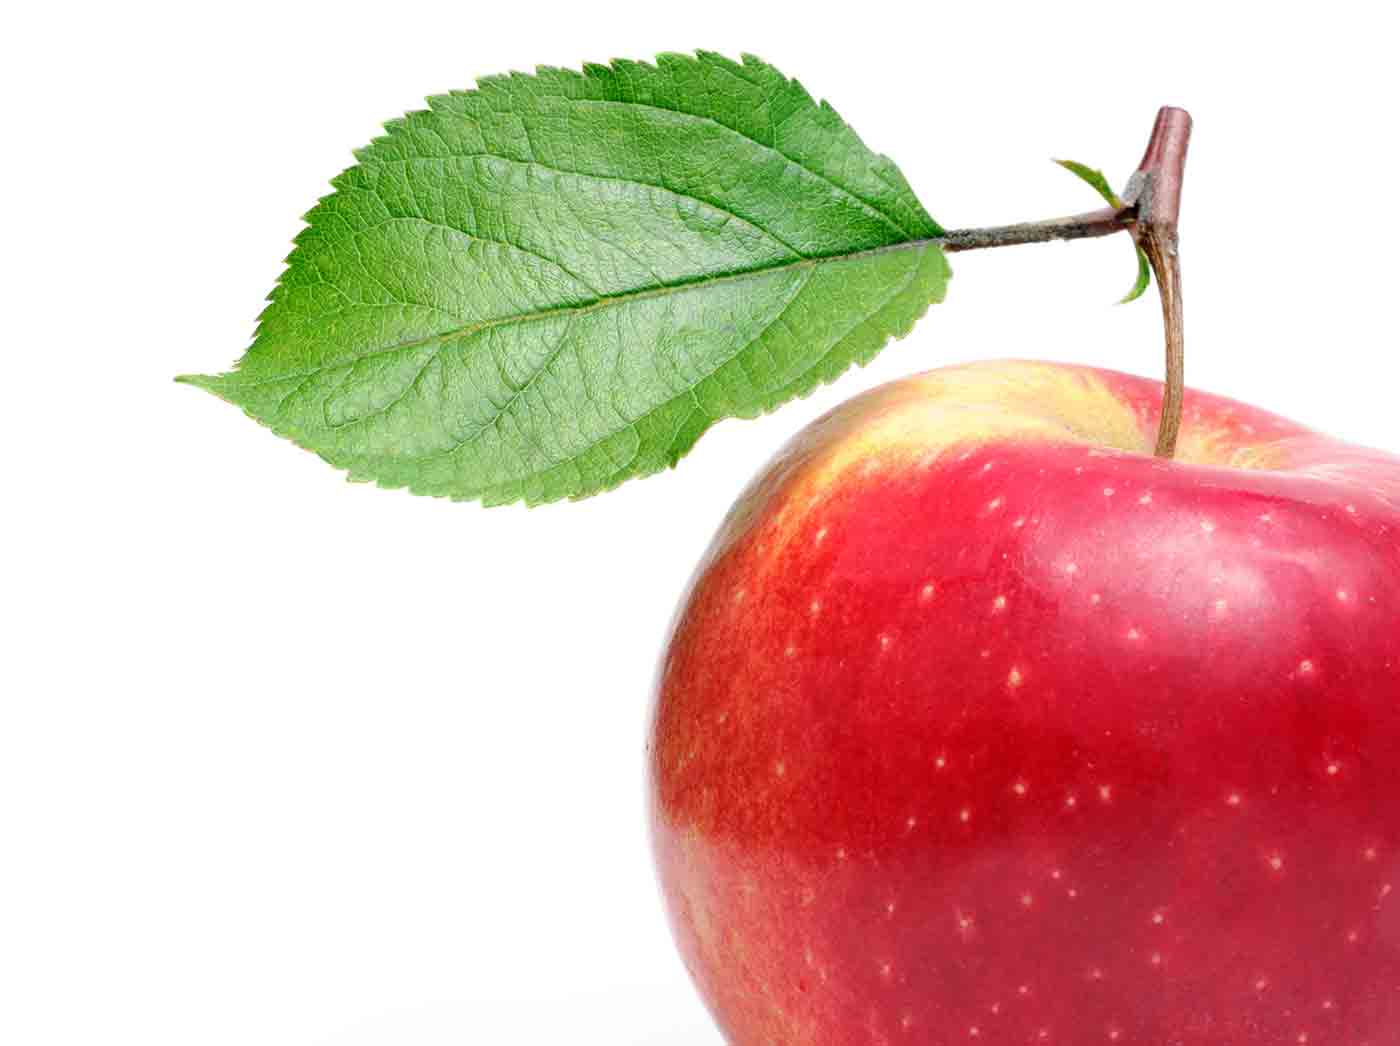

In [ ]:
from IPython.display import Image

Image("/content/drive/MyDrive/Colab Notebooks/archive/train_zip/train/apple_15.jpg")

In [ ]:
model = YOLO('/content/yolov8n.pt')
ret = model("/content/drive/MyDrive/Colab Notebooks/archive/test_zip/test",save=True, conf=0.2, iou=0.5)


image 1/60 /content/drive/MyDrive/Colab Notebooks/archive/test_zip/test/apple_77.jpg: 512x640 4 apples, 98.0ms
image 2/60 /content/drive/MyDrive/Colab Notebooks/archive/test_zip/test/apple_78.jpg: 640x640 1 apple, 18.9ms
image 3/60 /content/drive/MyDrive/Colab Notebooks/archive/test_zip/test/apple_79.jpg: 640x640 (no detections), 16.4ms
image 4/60 /content/drive/MyDrive/Colab Notebooks/archive/test_zip/test/apple_80.jpg: 544x640 1 apple, 85.8ms
image 5/60 /content/drive/MyDrive/Colab Notebooks/archive/test_zip/test/apple_81.jpg: 640x576 1 apple, 79.1ms
image 6/60 /content/drive/MyDrive/Colab Notebooks/archive/test_zip/test/apple_82.jpg: 640x576 1 umbrella, 1 apple, 1 vase, 9.5ms
image 7/60 /content/drive/MyDrive/Colab Notebooks/archive/test_zip/test/apple_83.jpg: 608x640 1 apple, 1 cake, 79.2ms
image 8/60 /content/drive/MyDrive/Colab Notebooks/archive/test_zip/test/apple_84.jpg: 448x640 10 apples, 86.8ms
image 9/60 /content/drive/MyDrive/Colab Notebooks/archive/test_zip/test/apple_85.

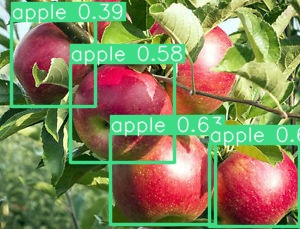

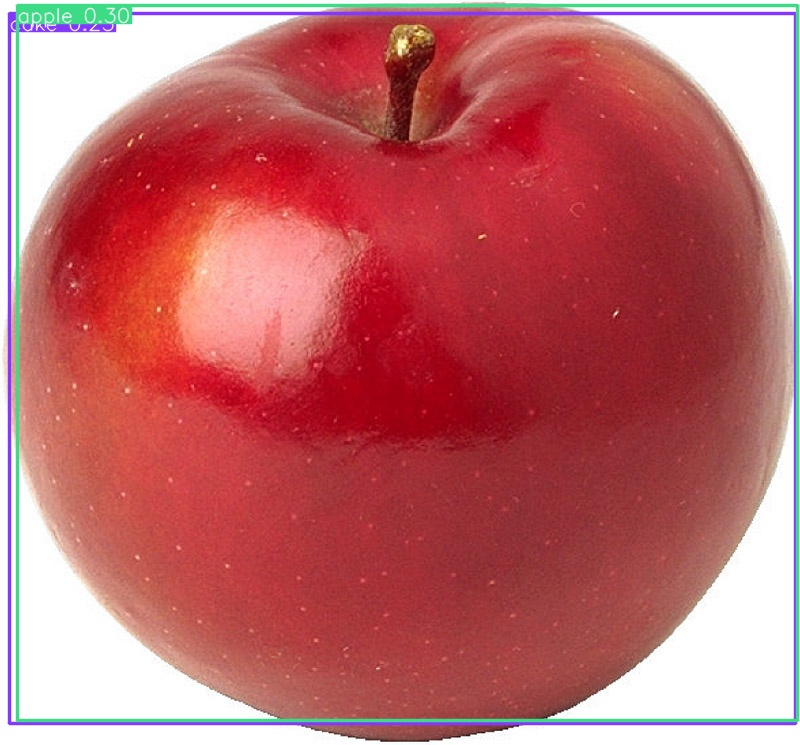

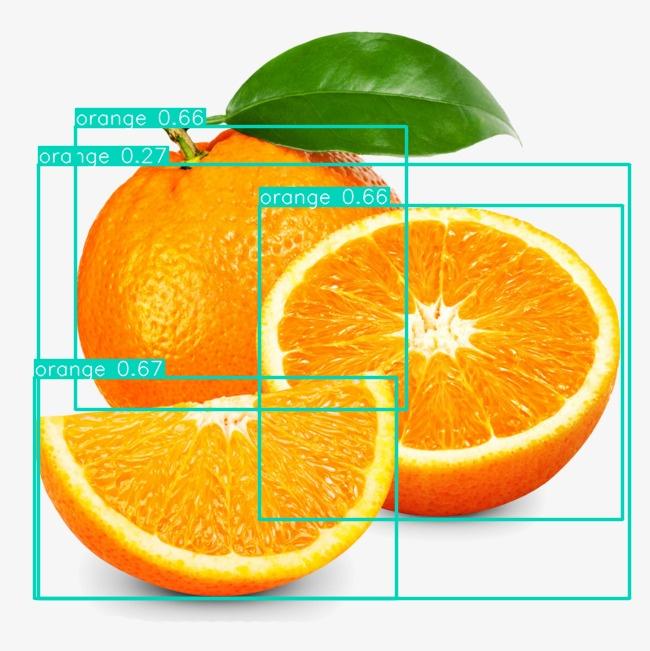

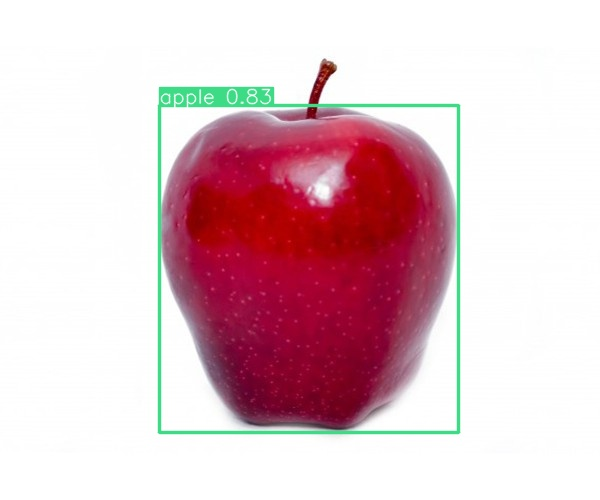

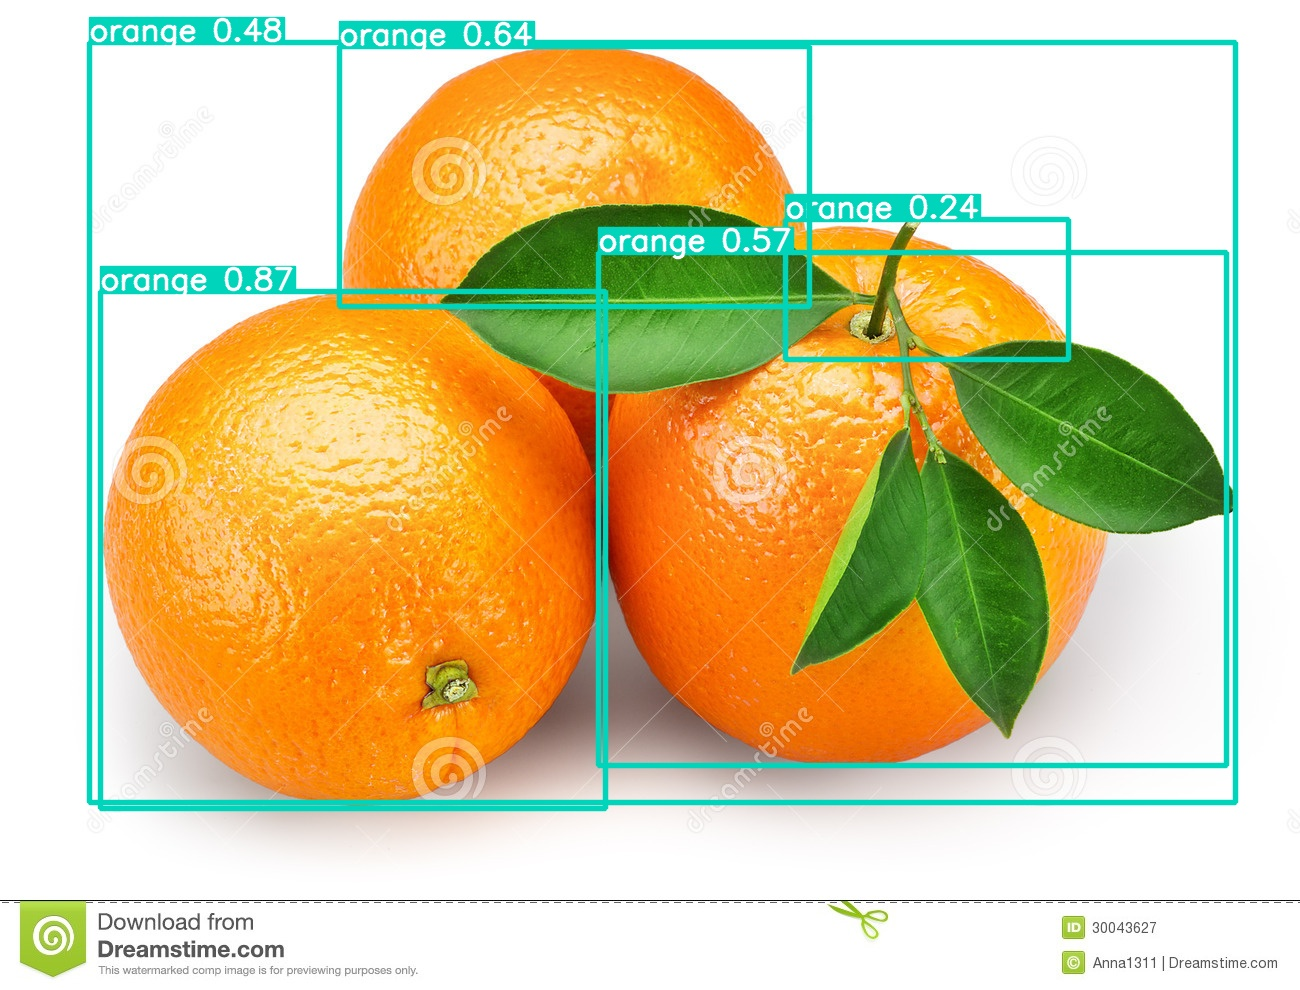

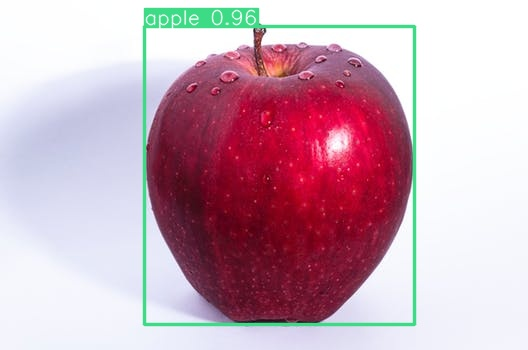

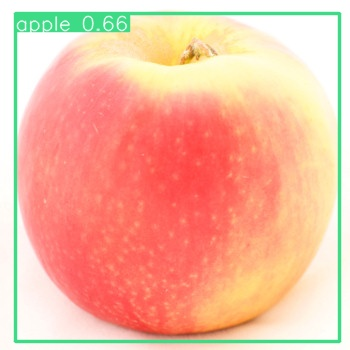

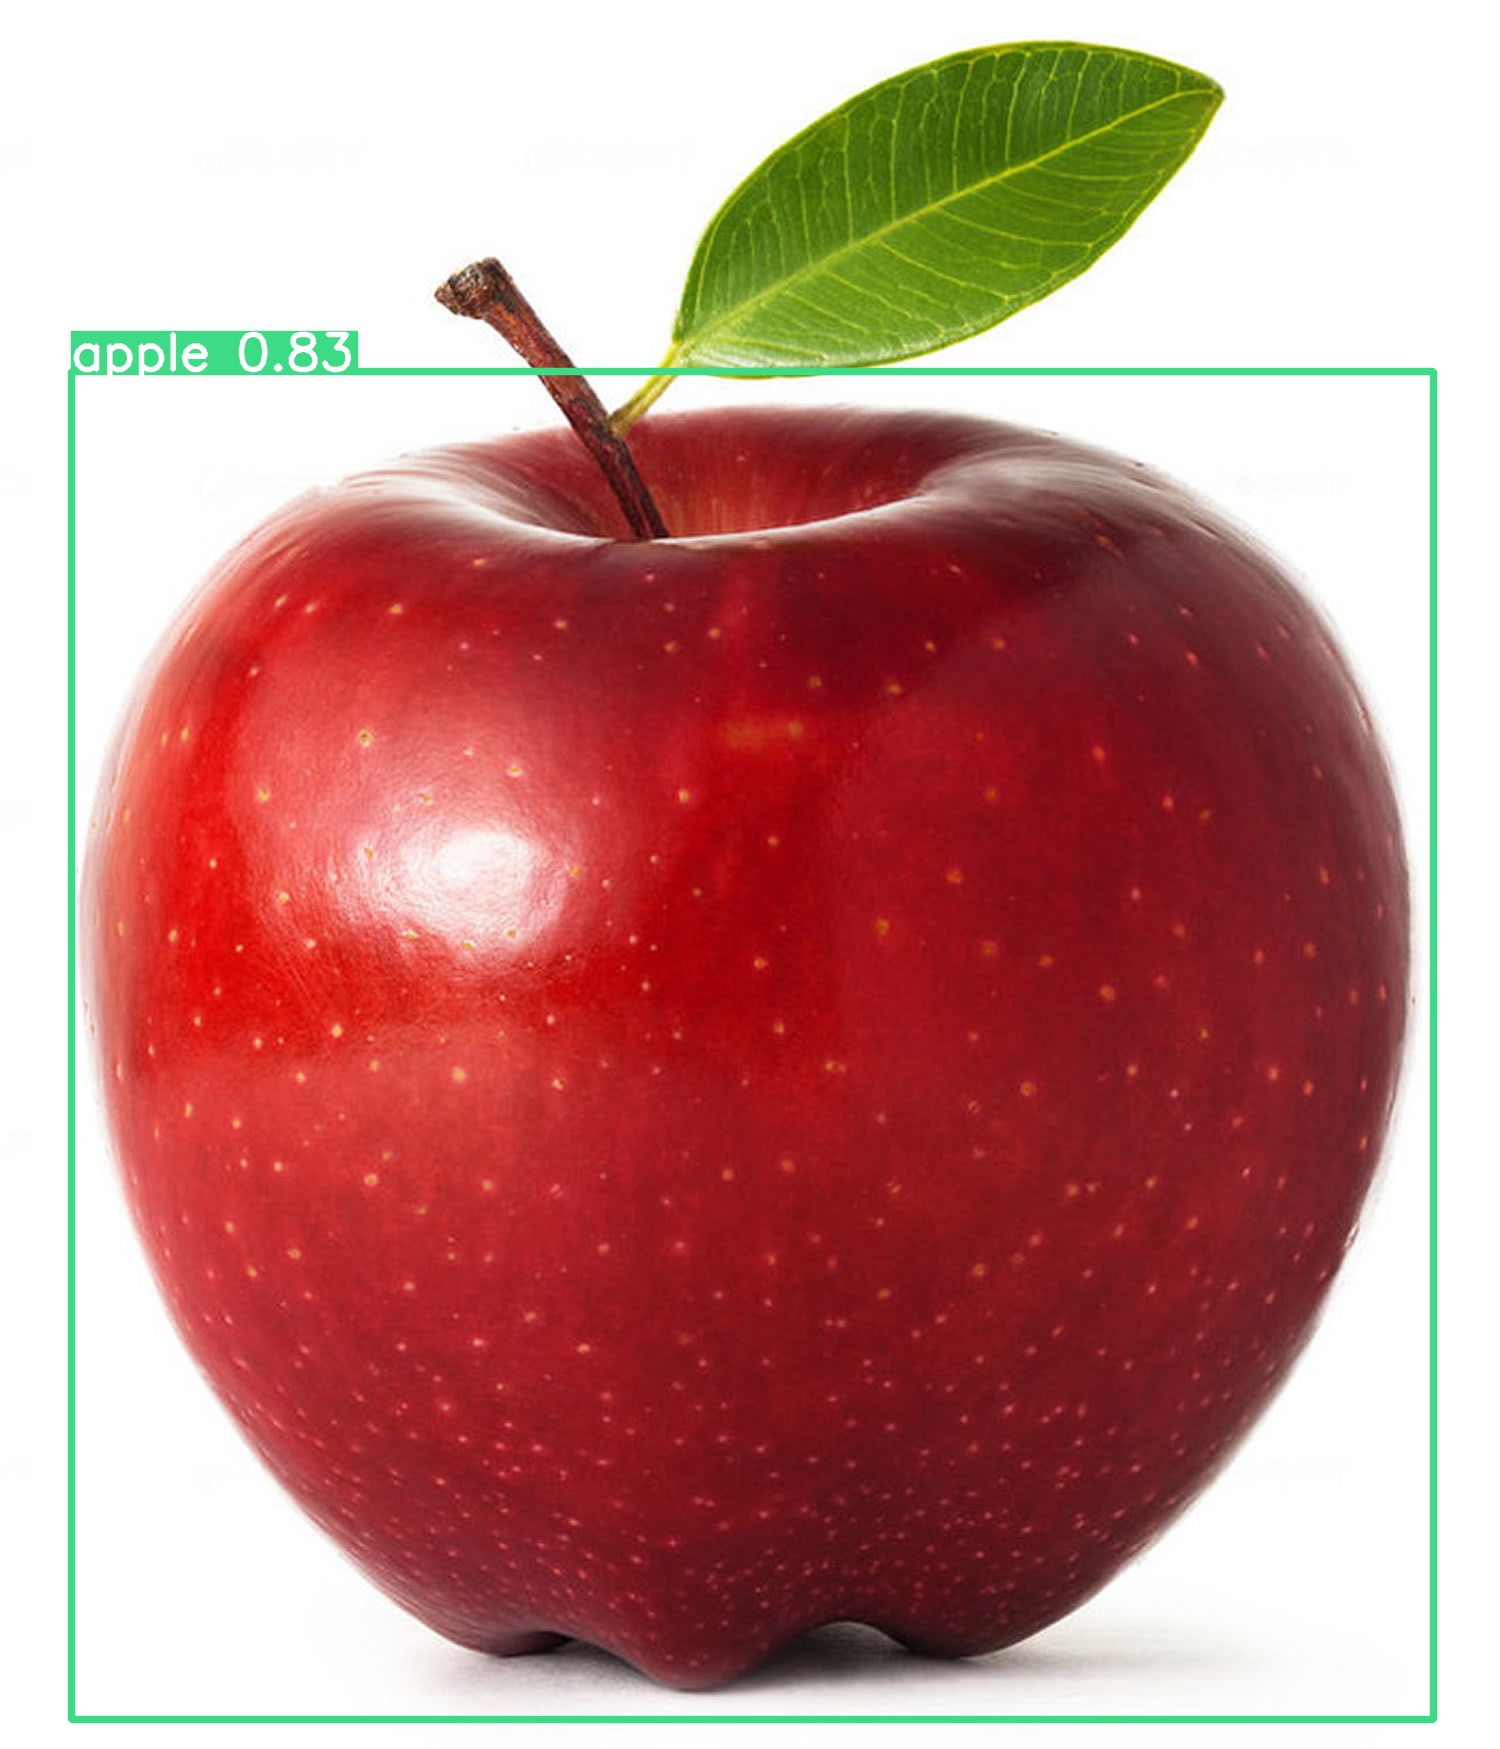

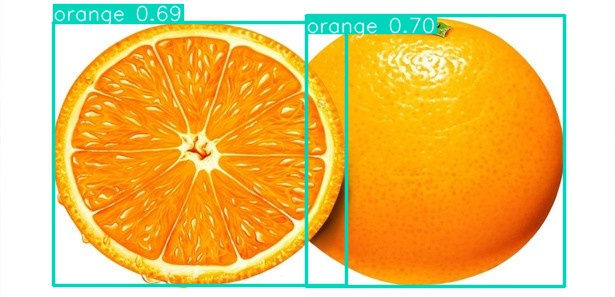

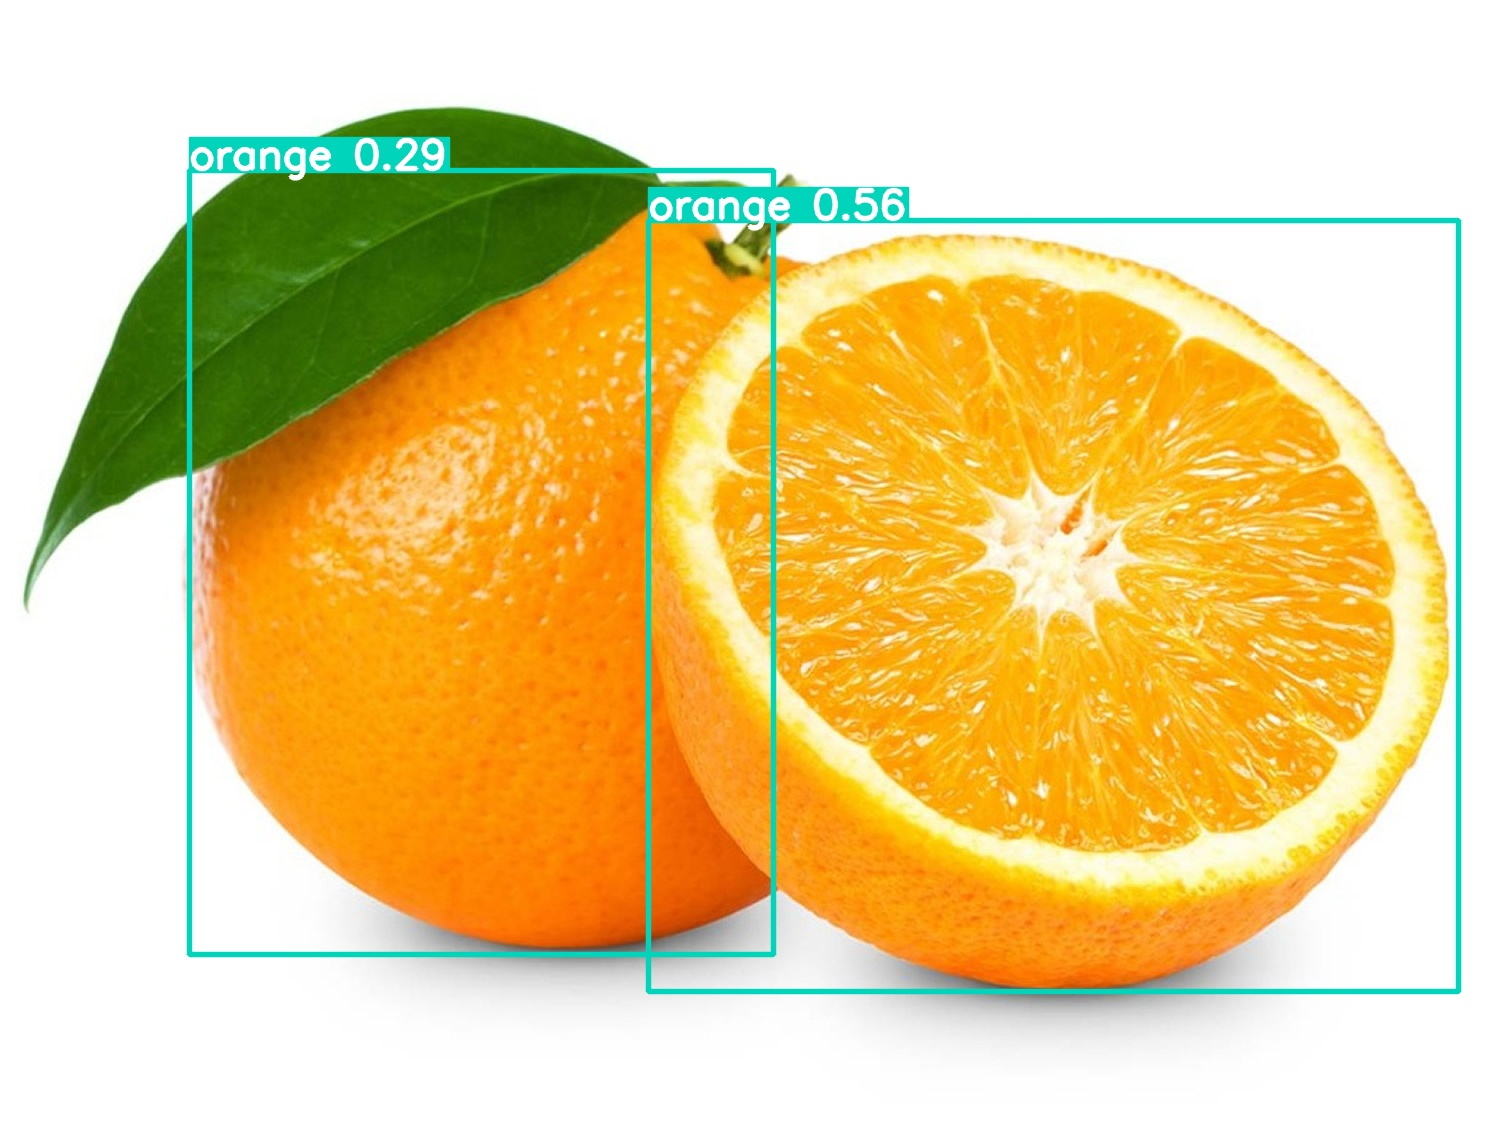

In [ ]:
# display result
files = glob.glob("./runs/detect/predict/*")
for i in range(0, 30, 3):
    img = Image(files[i])
    display(img)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
